# EVALUATION

In [21]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns

#from plotting_functions import boxplots, plot_reg_fit, only_transformed_bool_to_description
import warnings
warnings.filterwarnings('ignore')

In [3]:
OCADO_COLORS = {'green': '#B2B14D', 'blue': '#369BD0', 'grey': '#4B4C4E'}
#OCADO_COLORS = {'green': '#B2B14D', 'blue': '#369BD0', 'grey': '#4B4C4E',
#                "darkblue": "#90D7D3", "orange":"#FE7702"}
mpl.rcParams['font.size'] = 16.0
mpl.rcParams["boxplot.boxprops.linewidth"] = 2.0

# LOADING RESULTS

In [4]:
results_distances = pd.read_csv('./BORE/results_distances/results_distances.csv', delimiter="\t", header=0, index_col=0)

In [5]:
#HOWMUCH
results_xgboost = pd.read_csv('./BORE/results_howmuch/xgboost_howmuch.csv', delimiter="\t", header=0, index_col=0)
#results_tree = pd.read_csv('./BORE/results_forest.csv', delimiter="\t", header=0, index_col=0)
results_lg = pd.read_csv('./BORE/results_howmuch/lg_howmuch.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg = pd.read_csv('./BORE/results_howmuch/bore_lg_howmuch.csv', delimiter="\t", header=0, index_col=0)
results_bore_xgboost = pd.read_csv('./BORE/results_howmuch/bore_xgboost_howmuch.csv', delimiter="\t", header=0, index_col=0)

In [6]:
#RATIO
results_lg_ratio = pd.read_csv('./BORE/results_ratio/results_lg.csv', delimiter="\t", header=0, index_col=0)
results_xgboost_ratio = pd.read_csv('./BORE/results_ratio/results_xgboost.csv', delimiter="\t", header=0, index_col=0)
results_bore_xgboost_ratio = pd.read_csv('./BORE/results_ratio/bore_results_xgboost.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_ratio = pd.read_csv('./BORE/results_ratio/bore_results_lg.csv', delimiter="\t", header=0, index_col=0)

In [7]:
# Feature Exclusion Results
results_xgboost_no_categories = pd.read_csv('./BORE/feature_exclusion_results/results_xgboost_dataset_no_categories.csv', delimiter="\t", header=0, index_col=0)
results_xgboost_no_count = pd.read_csv('./BORE/feature_exclusion_results/results_xgboost_dataset_no_count.csv', delimiter="\t", header=0, index_col=0)
results_xgboost_no_minmax = pd.read_csv('./BORE/feature_exclusion_results/results_xgboost_dataset_no_minmax.csv', delimiter="\t", header=0, index_col=0)
results_xgboost_no_ratios = pd.read_csv('./BORE/feature_exclusion_results/results_xgboost_dataset_no_ratios.csv', delimiter="\t", header=0, index_col=0)
results_xgboost_original = pd.read_csv('./BORE/feature_exclusion_results/results_xgboost_dataset_original.csv', delimiter="\t", header=0, index_col=0)

results_lg_no_categories = pd.read_csv('./BORE/feature_exclusion_results/results_lg_dataset_no_categories.csv', delimiter="\t", header=0, index_col=0)
results_lg_no_count = pd.read_csv('./BORE/feature_exclusion_results/results_lg_dataset_no_count.csv', delimiter="\t", header=0, index_col=0)
results_lg_no_minmax = pd.read_csv('./BORE/feature_exclusion_results/results_lg_dataset_no_minmax.csv', delimiter="\t", header=0, index_col=0)
results_lg_no_ratios = pd.read_csv('./BORE/feature_exclusion_results/results_lg_dataset_no_ratios.csv', delimiter="\t", header=0, index_col=0)
results_lg_original = pd.read_csv('./BORE/feature_exclusion_results/results_lg_dataset_original.csv', delimiter="\t", header=0, index_col=0)

results_bore_xgboost_no_categories = pd.read_csv('./BORE/feature_exclusion_results/bore_results_xgboost_dataset_no_categories.csv', delimiter="\t", header=0, index_col=0)
results_bore_xgboost_no_count = pd.read_csv('./BORE/feature_exclusion_results/bore_results_xgboost_dataset_no_count.csv', delimiter="\t", header=0, index_col=0)
results_bore_xgboost_no_minmax = pd.read_csv('./BORE/feature_exclusion_results/bore_results_xgboost_dataset_no_minmax.csv', delimiter="\t", header=0, index_col=0)
results_bore_xgboost_no_ratios = pd.read_csv('./BORE/feature_exclusion_results/bore_results_xgboost_dataset_no_ratios.csv', delimiter="\t", header=0, index_col=0)
results_bore_xgboost_original = pd.read_csv('./BORE/feature_exclusion_results/bore_results_xgboost_dataset_original.csv', delimiter="\t", header=0, index_col=0)

results_bore_lg_no_categories = pd.read_csv('./BORE/feature_exclusion_results/bore_results_lg_dataset_no_categories.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_no_count = pd.read_csv('./BORE/feature_exclusion_results/bore_results_lg_dataset_no_count.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_no_minmax = pd.read_csv('./BORE/feature_exclusion_results/bore_results_lg_dataset_no_minmax.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_no_ratios = pd.read_csv('./BORE/feature_exclusion_results/bore_results_lg_dataset_no_ratios.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_original = pd.read_csv('./BORE/feature_exclusion_results/bore_results_lg_dataset_original.csv', delimiter="\t", header=0, index_col=0)


In [8]:
# RESULTS BAGS
results_bore_xgboost_bags = pd.read_csv('./BORE/results_bags/bore_results_xgboost_bags.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_bags = pd.read_csv('./BORE/results_bags/bore_results_lg_bags.csv', delimiter="\t", header=0, index_col=0)

In [10]:
# RESULTS BAGS_RATIO
results_bore_xgboost_bag_ratio = pd.read_csv('./BORE/results_bag_sample/bore_results_xgboost_bags.csv', delimiter="\t", header=0, index_col=0)
results_bore_lg_bag_ratio = pd.read_csv('./BORE/results_bag_sample/bore_results_lg_bags.csv', delimiter="\t", header=0, index_col=0)

In [11]:
# results higgs
results_higgs_xgboost = pd.read_csv('./BORE/results_higgs/results_xgboost_higgs_100.csv', delimiter="\t", header=0, index_col=0)
results_higgs_lg = pd.read_csv('./BORE/results_higgs/results_lg_higgs_100.csv', delimiter="\t", header=0, index_col=0)
results_bore_higgs_xgboost = pd.read_csv('./BORE/results_higgs/bore_results_xgboost_higgs_100.csv', delimiter="\t", header=0, index_col=0)
results_bore_higgs_lg = pd.read_csv('./BORE/results_higgs/bore_results_lg_higgs_100.csv', delimiter="\t", header=0, index_col=0)

In [12]:
# results time
results_transformation_time = pd.read_csv('./BORE/results_time/results_lg.csv', delimiter="\t", header=0, index_col=0)

# PLOTTING FUNCTIONS

In [66]:
re.sub("_", " ", "hal_lo")

'hal lo'

In [72]:
def only_transformed_bool_to_description(only_transformed_results, prefix=""):
    if only_transformed_results:
        return "{} only transformed features".format(prefix)
    else:
        return "{} combined features".format(prefix)

def plot_reg_fit(ax1, results_bore, results_pure=None, model_name="xgboost", experiment_name="", order=1, ci=80,
                 xfeature="subsample_number", yfeature="score", only_transformed=False,
                 color_sequence=["green", "blue", "grey"], PATCHES = None,
                xlabel="number of samples", ylabel="f1-score"):
    x_labels = np.unique(results_bore[xfeature])
    x_range = np.arange(len(x_labels))
    mapping_dict = dict(zip(x_labels, x_range))
    ax1.set_xlim([-0.1, max(x_range)+0.1])
     
    if PATCHES is None:
        PATCHES = []
    labels = []
    for i, (title, results) in enumerate(results_bore.groupby("only_transformed")):
        if not only_transformed or title:
            sns.regplot(results[xfeature].apply(lambda x: mapping_dict[x]),results[yfeature], 
                        scatter=True, ax=ax1, label=title, ci=ci,
                        color=OCADO_COLORS[color_sequence[i]], order=order,
                       x_bins=x_range, x_ci=50)
            PATCHES.append(mpatches.Patch(color=OCADO_COLORS[color_sequence[i]],
                                          label=only_transformed_bool_to_description(title, model_name)))
    if results_pure is not None:
        sns.regplot(results_pure[xfeature].apply(lambda x: mapping_dict[x]), results_pure[yfeature], 
                scatter=True, ax=ax1, label=title, ci=ci,
                color=OCADO_COLORS[color_sequence[2]], order=order, x_bins=x_range, x_ci=50)
        PATCHES.append(mpatches.Patch(color=OCADO_COLORS[color_sequence[2]],
                                      label=model_name))

    ax1.legend(handles=PATCHES)
    ax1.set_xticks(x_range)
    ax1.set_xticklabels(x_labels)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    return PATCHES
    
def boxplots(ax1, results_bore, results_pure, model_name, xfeature, yfeature, xlabel, ylabel, skipper,
            color_sequence=["green", "blue", "grey"]):    
    PATCHES = []
    labels = []
    for i, (title, results) in enumerate(results_bore.groupby("only_transformed")):
        if i>skipper:
            labels.append(title)
            mydf = pd.DataFrame()
            DFS = []
            for label, df in results.groupby(xfeature):
                DFS.append(pd.DataFrame({re.sub("_", " ", label): df[yfeature].values}))   
            mydf = pd.concat(DFS, axis=1)
            mydf.plot(kind="box", ax=ax1, color=OCADO_COLORS[color_sequence[i]], whis="range")
            PATCHES.append(mpatches.Patch(color=OCADO_COLORS[color_sequence[i]],
                                          label=only_transformed_bool_to_description(title, model_name)))
        else:
            print("")

    mydf = pd.DataFrame()
    DFS = []
    for label, df in results_pure.groupby(xfeature):
        DFS.append(pd.DataFrame({re.sub("_", " ", label): df[yfeature].values}))    
    mydf = pd.concat(DFS, axis=1)
    mydf.plot(kind="box", ax=ax1, color=OCADO_COLORS[color_sequence[2]], whis="range")
    PATCHES.append(mpatches.Patch(color=OCADO_COLORS[color_sequence[2]],
                                  label=re.sub("_", " ", model_name)))


    ax1.legend(handles=PATCHES)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    

def plot_hp_results(df, angle):
    df = df.sort_values(["n_neighbors", "n_gaussians"])
    
    X1 = np.reshape(df["n_neighbors"], (10,10))
    X2 = np.reshape(df["n_gaussians"], (10,10))
    Z = np.reshape(df["time_transformed"], (10,10))
    
    fig1 = plt.figure(figsize=(12,8), dpi=120)
    ax1  = fig1.add_subplot(1,1,1, projection="3d")
    ax1.view_init(30, angle)
    ax1.plot_surface(X1,X2,Z, color=OCADO_COLORS["blue"])
    ax1.set_xlabel('number of neighbors')
    ax1.set_ylabel('number of gaussians')
    ax1.set_zlabel('time in s')

# PLOTTING

## DISTANCES

In [13]:
results_distances.distance = results_distances.distance.apply(lambda x: int(re.sub("[^0-9]", "", x)))
results_distances.sort_values(["distance"], inplace=True)

Text(0,0.5,'f1-score')

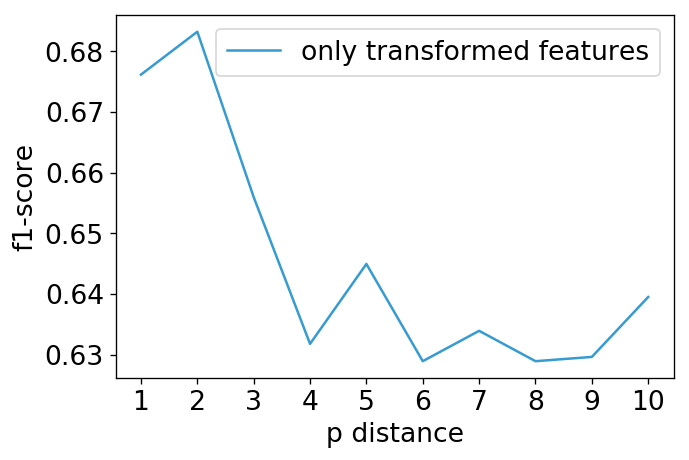

In [39]:
# Distances lg

fig1, ax1 = plt.subplots(figsize=(6,4), dpi=120)
labels = []
results_distances.plot("distance", "score", color=OCADO_COLORS["blue"],
                       label="only transformed features", ax=ax1)
ax1.set_xticks(range(10))
ax1.set_xticklabels(range(1,11))

ax1.legend()
ax1.set_xlabel("p distance")
ax1.set_ylabel("f1-score")

# HOW MUCH DATA

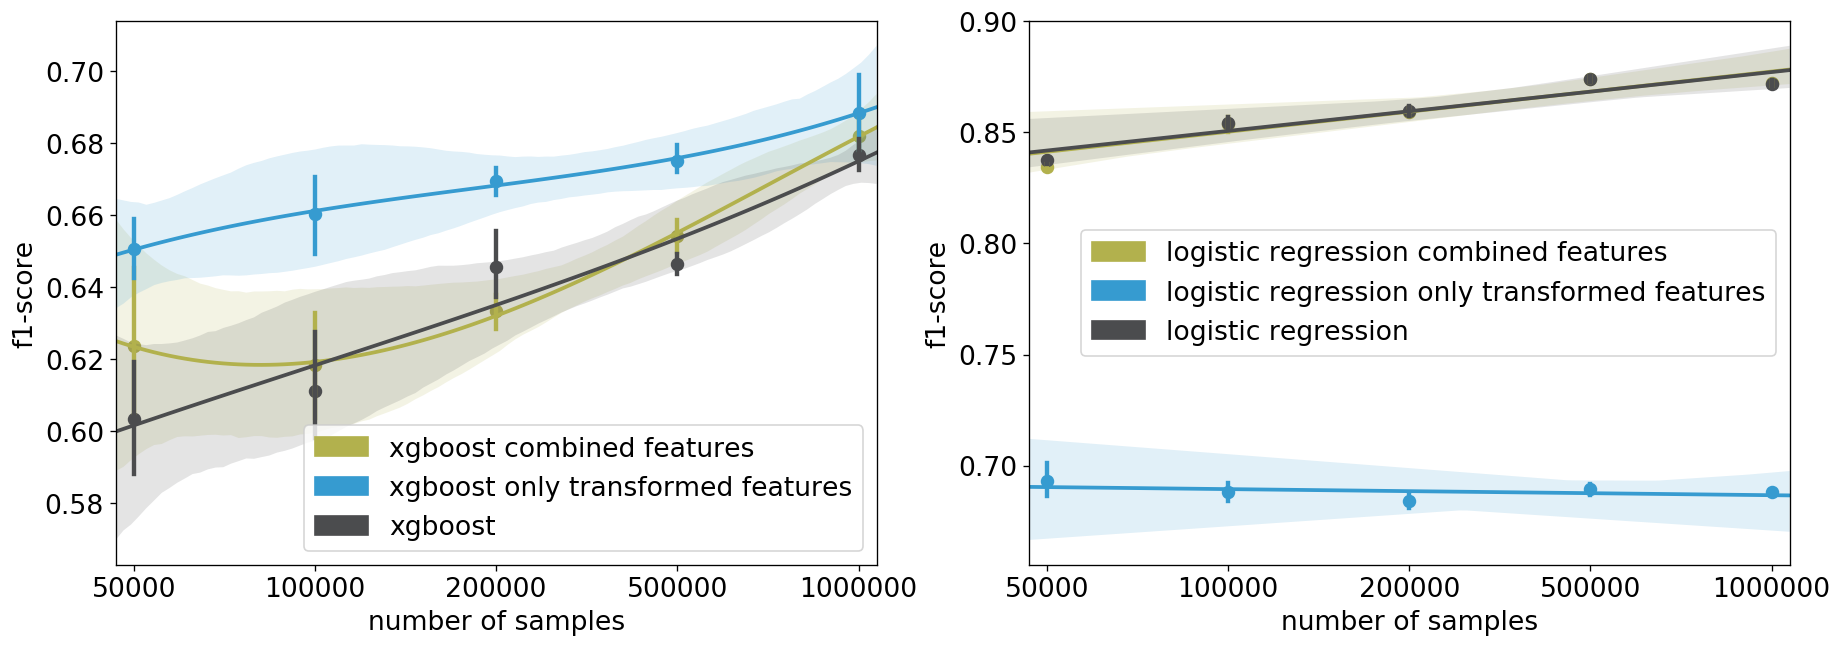

In [55]:
results_bore_lg = results_bore_lg.loc[results_bore_lg.subsample_number>20000]
results_lg = results_lg.loc[results_lg.subsample_number>20000]
results_bore_xgboost = results_bore_xgboost.loc[results_bore_xgboost.subsample_number>20000]
results_xgboost = results_xgboost.loc[results_xgboost.subsample_number>20000]
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6), dpi=120)

plot_reg_fit(ax1, results_bore_xgboost, results_xgboost, "xgboost", "howmuch",3, ci=75)
plot_reg_fit(ax2, results_bore_lg, results_lg, "logistic regression", "howmuch",1, ci=100)

# RATIOS

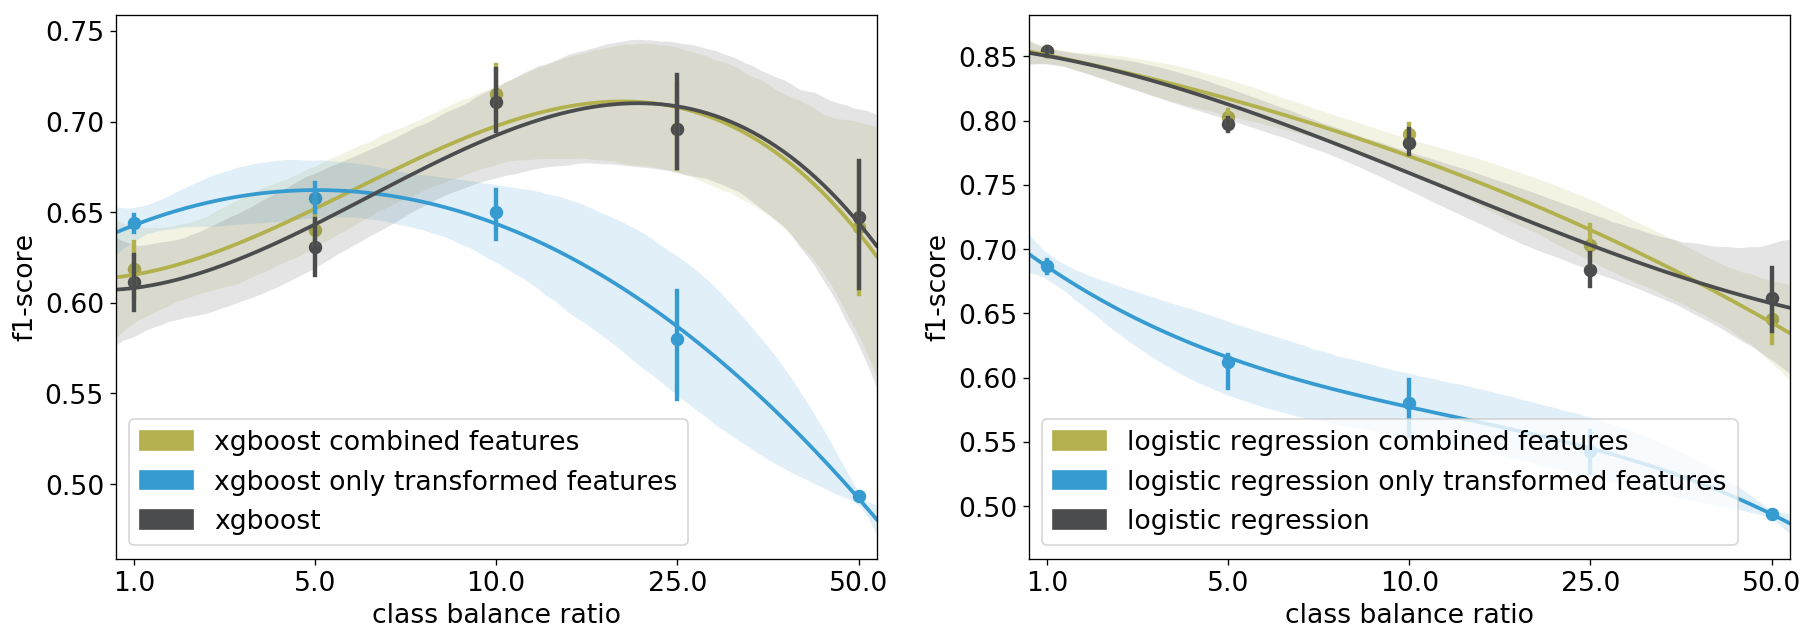

In [76]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6), dpi=120)
plot_reg_fit(ax1, results_bore_xgboost_ratio, results_xgboost_ratio, "xgboost", "",3, ci=75,
             xfeature="class_balance_ratio", xlabel="class balance ratio")
plot_reg_fit(ax2, results_bore_lg_ratio, results_lg_ratio, "logistic regression", "",3, ci=75,
             xfeature="class_balance_ratio", xlabel="class balance ratio")

# FEATURE EXCLUSION

In [42]:
DFS_xgboost = [results_xgboost_no_categories, results_xgboost_no_count, results_xgboost_no_minmax,
       results_xgboost_no_ratios, results_xgboost_original]
DFS_BORE_xgb = [results_bore_xgboost_no_categories, results_bore_xgboost_no_count, results_bore_xgboost_no_minmax,
               results_bore_xgboost_no_ratios, results_bore_xgboost_original]

DFS_lg = [results_lg_no_categories, results_lg_no_count, results_lg_no_minmax,
       results_lg_no_ratios, results_lg_original]
DFS_BORE_lg = [results_bore_lg_no_categories, results_bore_lg_no_count, results_bore_lg_no_minmax,
               results_bore_lg_no_ratios, results_bore_lg_original]

results_bore_xgb_features = pd.concat(DFS_BORE_xgb, axis=0)
results_pure_xgb_features = pd.concat(DFS_xgboost, axis=0)

results_bore_lg_features = pd.concat(DFS_BORE_lg, axis=0)
results_pure_lg_features = pd.concat(DFS_lg, axis=0)

def niceNames(df):
    df.problem_id = df.problem_id.apply(lambda name: re.sub("dataset_", "", name))
    
niceNames(results_bore_xgb_features)
niceNames(results_bore_lg_features)
niceNames(results_pure_xgb_features)
niceNames(results_pure_lg_features)

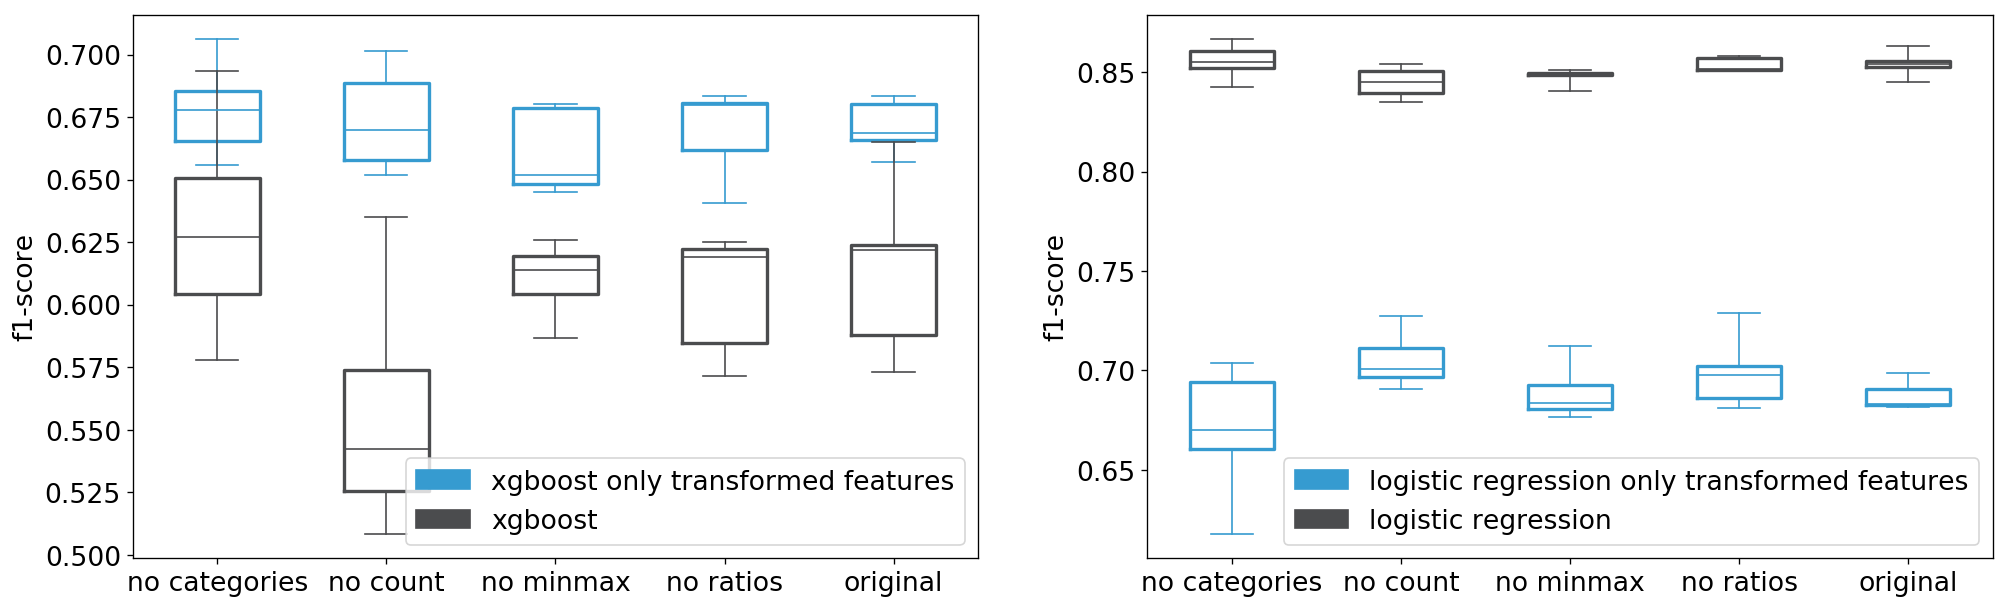

In [74]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6), dpi=120)

boxplots(ax1, results_bore_xgb_features, results_pure_xgb_features, model_name="xgboost", 
         xfeature="problem_id", yfeature="score", xlabel="", ylabel="f1-score", skipper=0)

boxplots(ax2, results_bore_lg_features, results_pure_lg_features, model_name="logistic regression", 
         xfeature="problem_id", yfeature="score", xlabel="", ylabel="f1-score", skipper=0)

# TIME

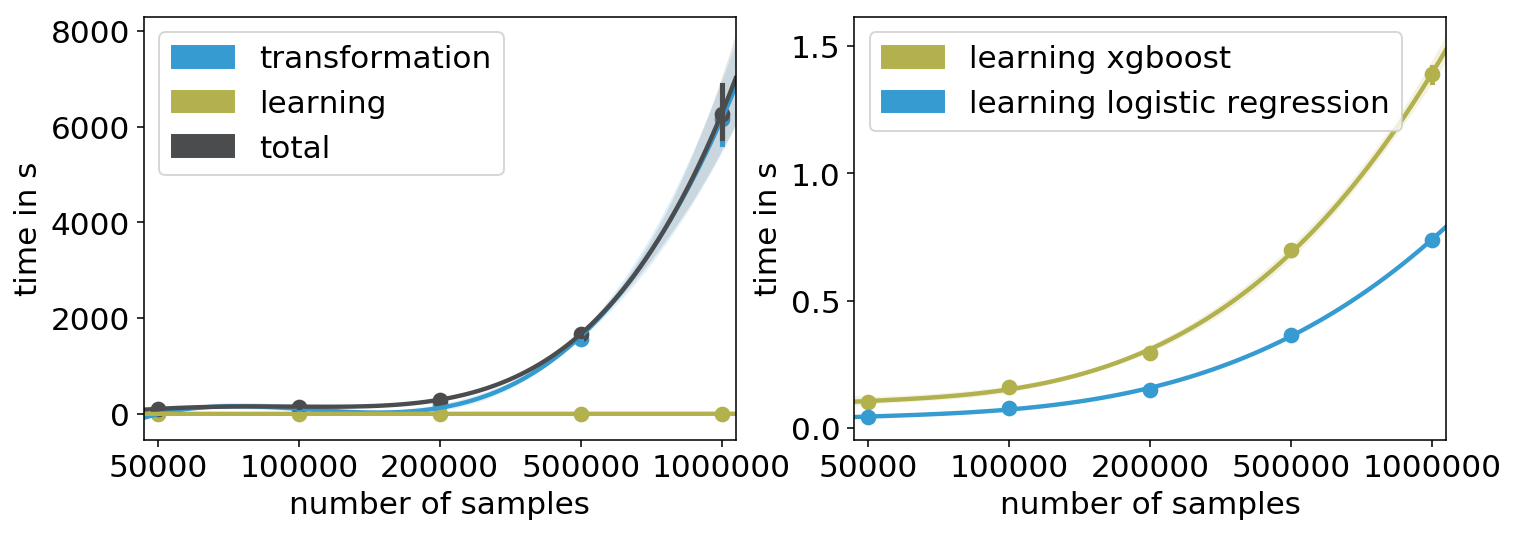

In [51]:
results_bore_xgboost.time_learned = results_bore_xgboost.time_learned.apply(lambda x: abs(x))
results_bore_lg.time_learned = results_bore_lg.time_learned.apply(lambda x: abs(x))


fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=140)
plot_reg_fit(ax1, results_bore_xgboost,model_name="transforming", order=3, ci=75, yfeature="time_transformed",
             only_transformed=True, ylabel="time in s")
plot_reg_fit(ax1, results_bore_xgboost,model_name="learning", order=3, ci=75, yfeature="time_learned",
             only_transformed=True, color_sequence=["green", "green", "grey"])
plot_reg_fit(ax1, results_bore_xgboost,model_name="total", order=4, ci=75, yfeature="time_total",
             only_transformed=True, color_sequence=["grey", "grey", "grey"],
            ylabel="time in s")


PATCHES=[]
PATCHES.append(mpatches.Patch(color=OCADO_COLORS["blue"], label="transformation"))
PATCHES.append(mpatches.Patch(color=OCADO_COLORS["green"], label="learning"))
PATCHES.append(mpatches.Patch(color=OCADO_COLORS["grey"], label="total"))
ax1.legend(handles=PATCHES)

plot_reg_fit(ax2, results_bore_xgboost,model_name="learning xgboost", order=3, ci=75, yfeature="time_learned",
             only_transformed=True, color_sequence=["green", "green", "grey"])
plot_reg_fit(ax2, results_bore_lg,model_name="learning logistic regression", order=3, ci=75, yfeature="time_learned",
             only_transformed=True, color_sequence=["blue", "blue", "grey"],
            ylabel="time in s")

PATCHES=[]
PATCHES.append(mpatches.Patch(color=OCADO_COLORS["green"], label="learning xgboost"))
PATCHES.append(mpatches.Patch(color=OCADO_COLORS["blue"], label="learning logistic regression"))
ax2.legend(handles=PATCHES)


# NUMBER OF BAGS

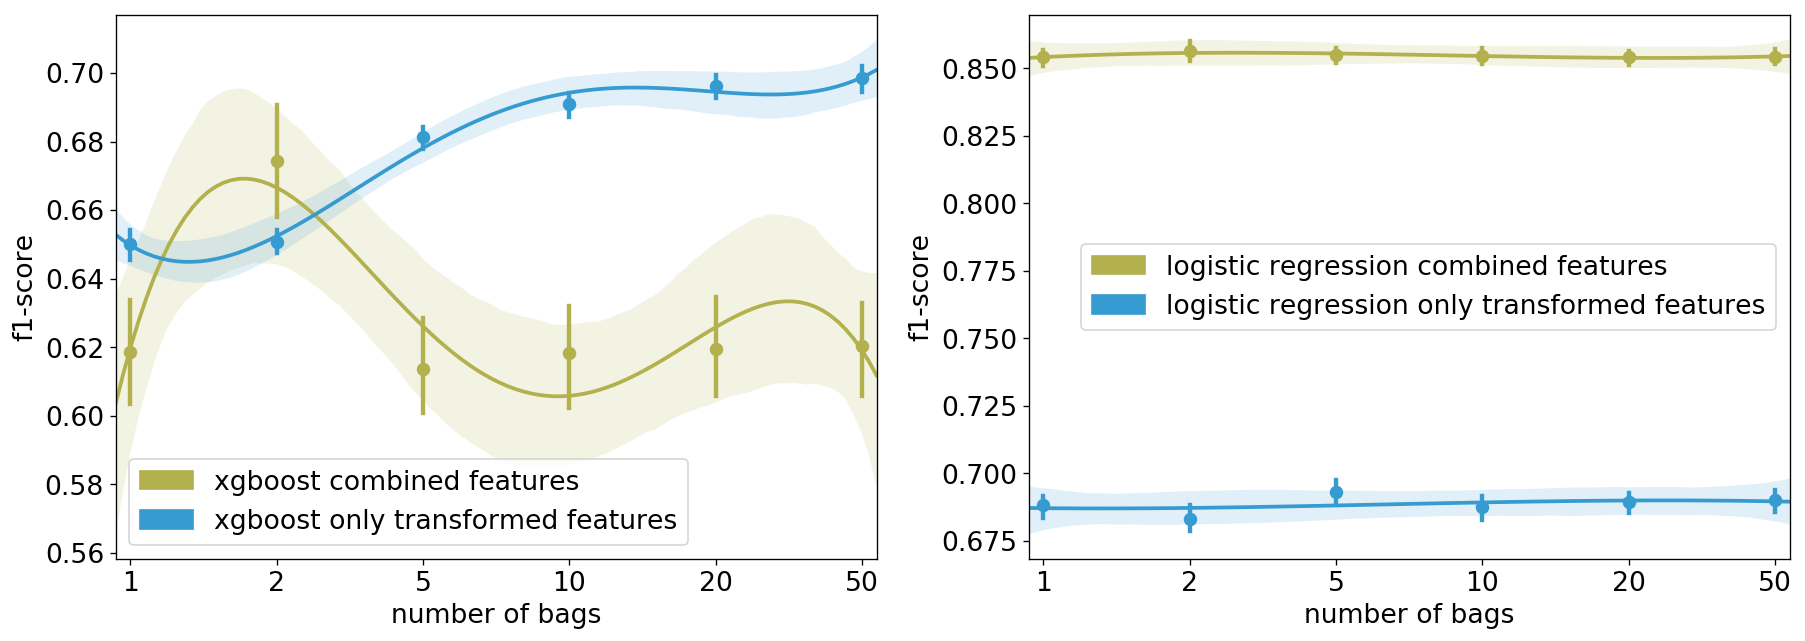

In [28]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6), dpi=120)
plot_reg_fit(ax1, results_bore_xgboost_bags, model_name="xgboost",order=4, ci=75,
             xfeature="bags", xlabel="number of bags")
plot_reg_fit(ax2, results_bore_lg_bags, model_name="logistic regression",order=3, ci=75,
             xfeature="bags", xlabel="number of bags")

# BAGS SAMPLE RATIO

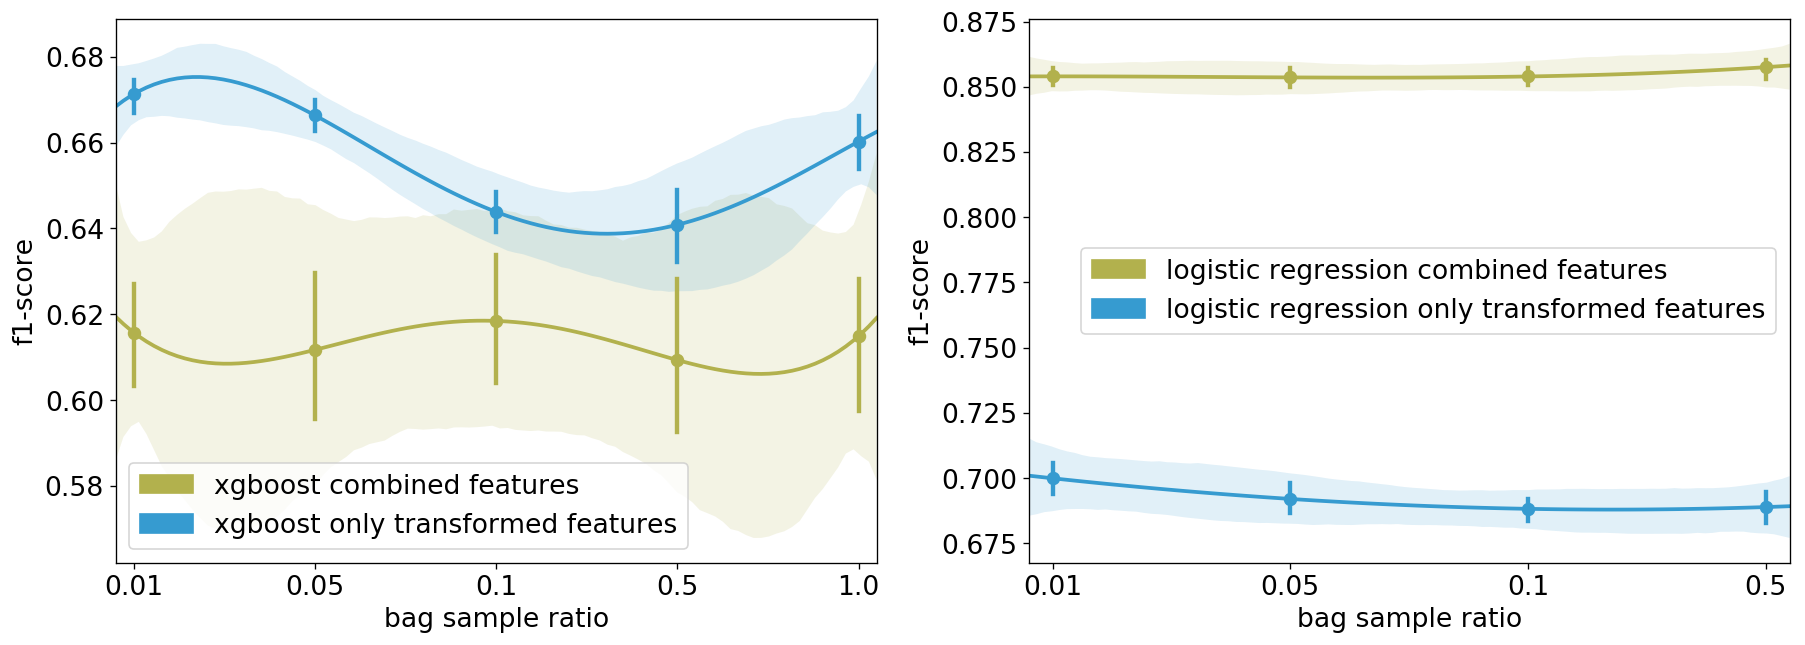

In [31]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6), dpi=120)
plot_reg_fit(ax1, results_bore_xgboost_bag_ratio, model_name="xgboost",order=4, ci=75,
             xfeature="bag_sample_ratio", xlabel="bag sample ratio")
plot_reg_fit(ax2, results_bore_lg_bag_ratio, model_name="logistic regression",order=3, ci=75,
             xfeature="bag_sample_ratio", xlabel="bag sample ratio")

# COMPUTATIONAL COMPLEXITY

In [42]:
results_no_duplicates = pd.DataFrame()
for title, result in results_transformation_time.groupby(["n_neighbors", "n_gaussians"]):
    results_no_duplicates = results_no_duplicates.append(result.iloc[0])

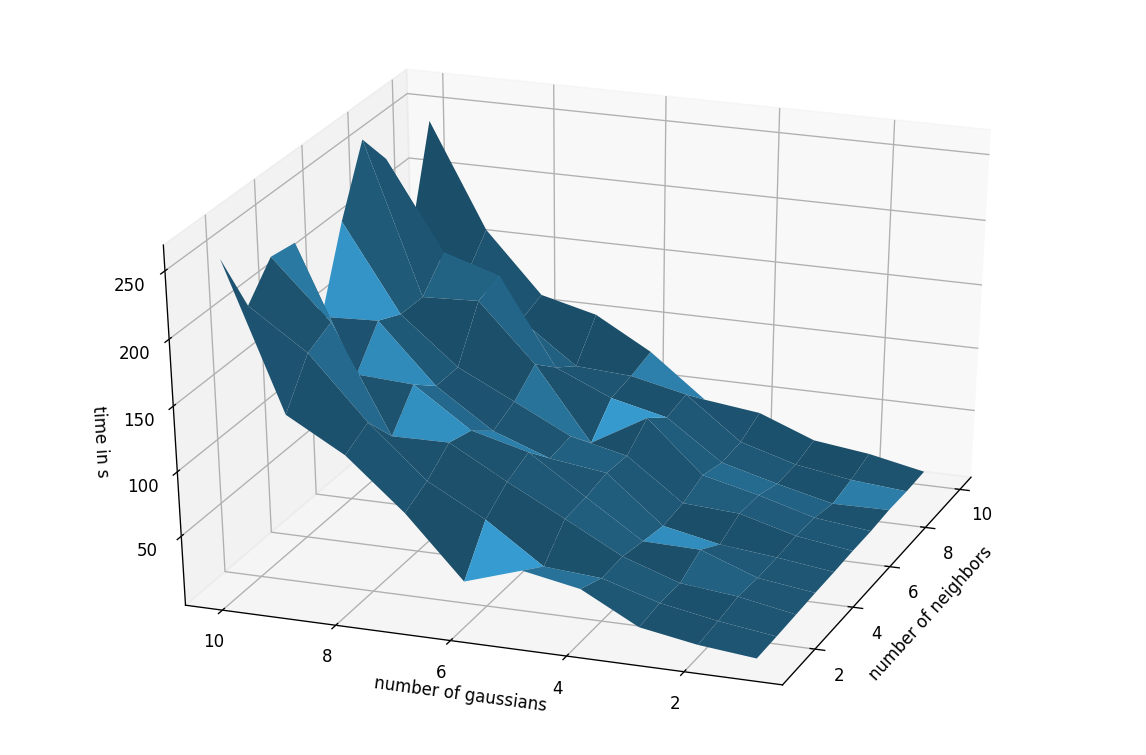

In [43]:
%matplotlib inline
plot_hp_results(results_no_duplicates, 200)

# HIGGS BOSON CHALLENGE

Text(0,0.5,'f1-score')

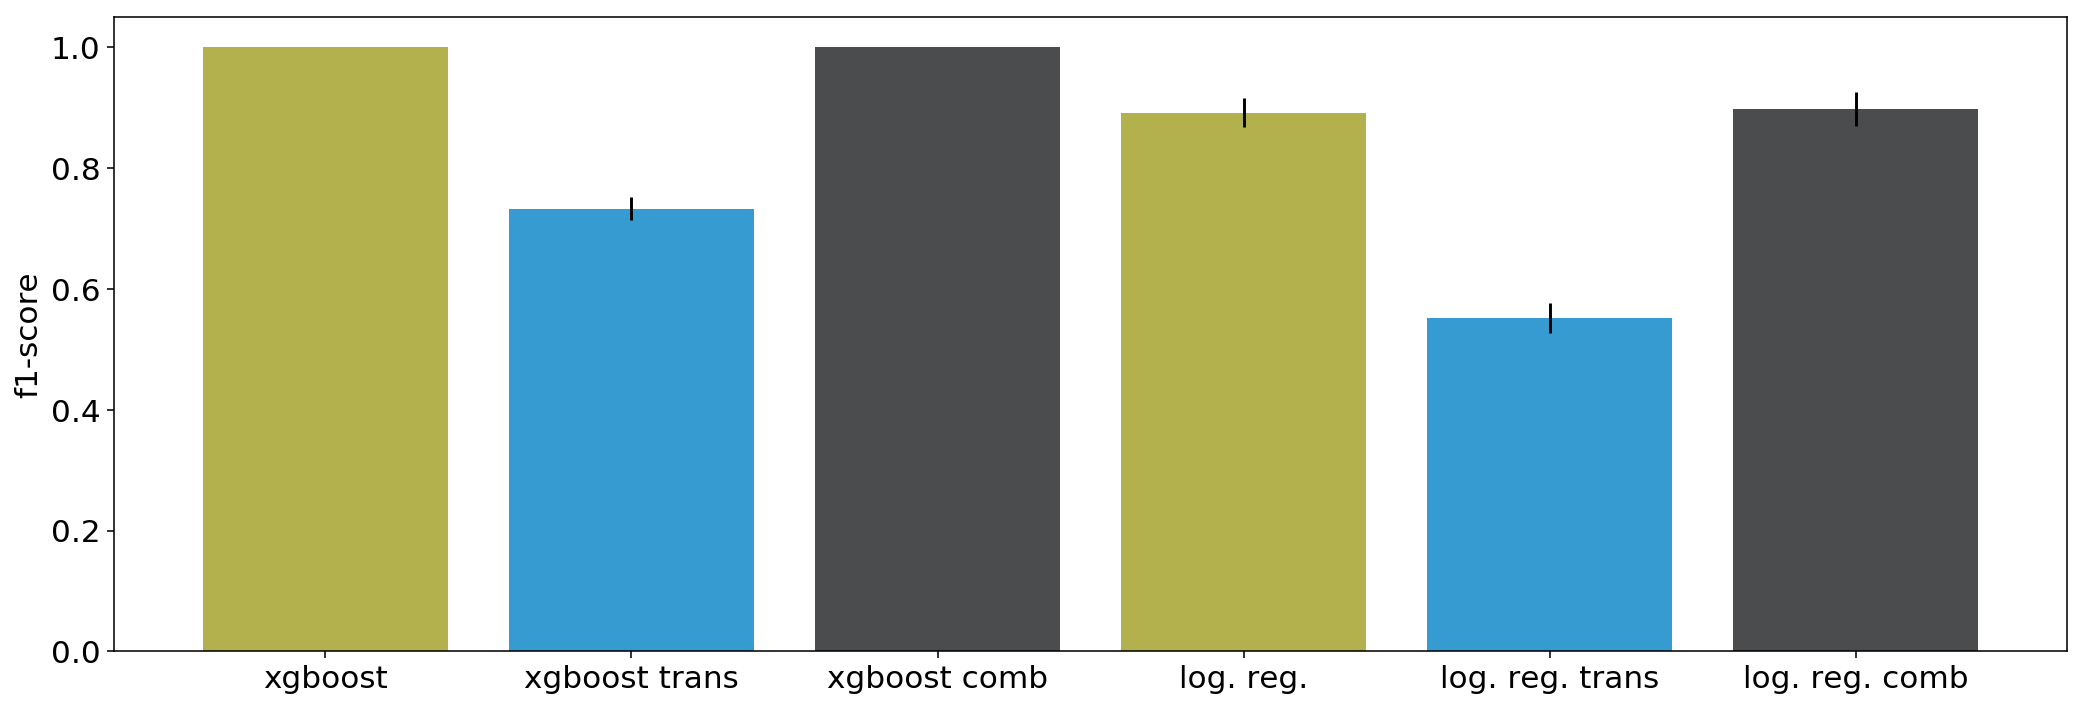

In [75]:
fig1, ax1 = plt.subplots( figsize=(18,6), dpi=140)
axes = [ax1, ax2]

class_balance = 1.0
bore_lg = results_bore_higgs_lg.loc[results_bore_higgs_lg.class_balance_ratio==class_balance]
bore_xgb = results_bore_higgs_xgboost.loc[results_bore_higgs_xgboost.class_balance_ratio==class_balance]
lg = results_higgs_lg.loc[results_higgs_lg.class_balance_ratio==class_balance]
xgb = results_higgs_xgboost.loc[results_higgs_xgboost.class_balance_ratio==class_balance]
score_bore_trans_lg = bore_lg.loc[bore_lg.only_transformed==True].mean().score
score_bore_trans_xgb = bore_xgb.loc[bore_xgb.only_transformed==True].mean().score
score_bore_combined_lg = bore_lg.loc[bore_lg.only_transformed==False].mean().score
score_bore_combined_xgb = bore_xgb.loc[bore_xgb.only_transformed==False].mean().score
score_lg = lg.mean().score
score_xgb = xgb.mean().score

std_bore_trans_lg = bore_lg.loc[bore_lg.only_transformed==True].std().score
std_bore_trans_xgb = bore_xgb.loc[bore_xgb.only_transformed==True].std().score
std_bore_combined_lg = bore_lg.loc[bore_lg.only_transformed==False].std().score
std_bore_combined_xgb = bore_xgb.loc[bore_xgb.only_transformed==False].std().score
std_lg = lg.std().score
std_xgb = xgb.std().score

err = [std_xgb, std_bore_trans_xgb, std_bore_combined_xgb, std_lg, std_bore_trans_lg,
          std_bore_combined_lg]
scores = [score_xgb, score_bore_trans_xgb, score_bore_combined_xgb, score_lg, score_bore_trans_lg,
          score_bore_combined_lg]
labels = ["xgboost", "xgboost trans", "xgboost comb", "log. reg.", "log. reg. trans", "log. reg. comb"]
colors = [OCADO_COLORS["green"], OCADO_COLORS["blue"], OCADO_COLORS["grey"],
          OCADO_COLORS["green"], OCADO_COLORS["blue"], OCADO_COLORS["grey"]]
    
ax1.bar(range(6), scores, tick_label=labels, yerr=err, color=colors)
ax1.set_ylabel("f1-score")